<a href="https://colab.research.google.com/github/GanduKavya/pollen-grain--classification/blob/main/Pollen_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!unzip -q /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip -d /content/pollen_dataset


unzip:  cannot find or open /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip, /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.zip or /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.ZIP.


In [3]:
!unzip -q /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip -d /content

unzip:  cannot find or open /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip, /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.zip or /content/d9409e3d-2e18-4aca-8999-b15445f2a436.zip.ZIP.


In [4]:
import os

print("Extracted folders in /content:")
for item in os.listdir("/content"):
    print("📁", item)

Extracted folders in /content:
📁 .config
📁 Pollen_Profiling.zip
📁 sample_data


In [5]:
!find /content -type d -name "train"

In [6]:
!unzip -q /content/pollen_dataset.zip -d /content

unzip:  cannot find or open /content/pollen_dataset.zip, /content/pollen_dataset.zip.zip or /content/pollen_dataset.zip.ZIP.


In [7]:
import os

print("Extracted folders in /content:")
for item in os.listdir("/content"):
    print("📁", item)

Extracted folders in /content:
📁 .config
📁 Pollen_Profiling.zip
📁 sample_data


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Normalize pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
!unzip -q /content/pollen_dataset.zip -d /content/pollen_dataset

unzip:  cannot find or open /content/pollen_dataset.zip, /content/pollen_dataset.zip.zip or /content/pollen_dataset.zip.ZIP.


Let's try unzipping the dataset again to the correct directory.

In [15]:
import os
import zipfile

zip_path = '/content/Pollen_Profiling.zip'  # Corrected zip file name
extract_path = '/content/pollen_dataset' # Extract to this directory

# Check if the zip file exists before attempting to unzip
if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Successfully unzipped {zip_path} to {extract_path}")
    except zipfile.BadZipFile:
        print(f"Error: {zip_path} is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred while unzipping: {e}")
else:
    print(f"Error: Zip file not found at {zip_path}. Please ensure the dataset zip file is uploaded to Colab.")

Successfully unzipped /content/Pollen_Profiling.zip to /content/pollen_dataset


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Normalize image pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the base directory for the extracted dataset, including the subdirectory
dataset_dir = '/content/pollen_dataset/Pollen_Profiling'

# Load training and testing images from the correct path
train_set = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'Train'),     # ✅ Now points to correct path
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'Test'),      # ✅ Same here
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 125 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [17]:
# If you haven't run this yet, run this cell first to prepare your data:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

dataset_path = "/content/pollen_dataset"  # your dataset folder path

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 140 images belonging to 1 classes.
Found 35 images belonging to 1 classes.


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (224, 224, 3)
num_classes = train_generator.num_classes

model = Sequential([
    Input(shape=input_shape),     # <-- Add this line instead of input_shape in Conv2D
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [62]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/py

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 -

Classes found in training set: ['combretum', 'cecropia', 'arecaceae', 'chromolaena', 'arrabidaea']


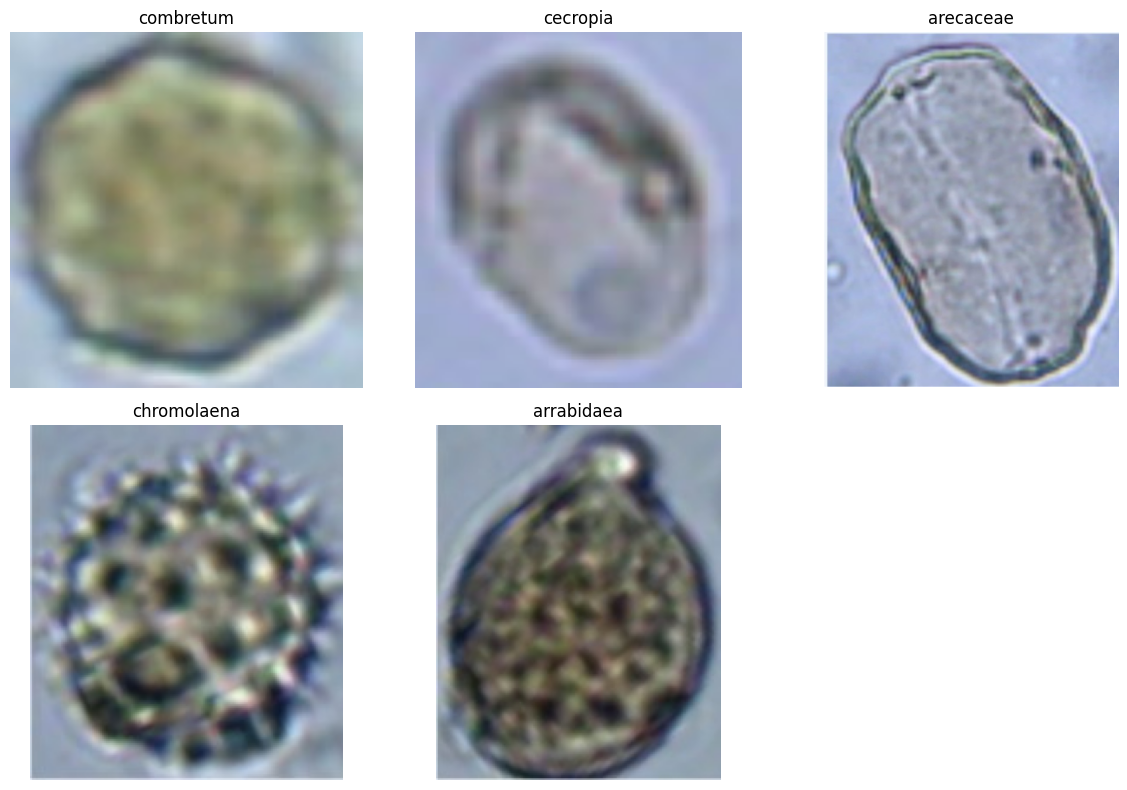

In [64]:
import matplotlib.pyplot as plt
import os
import cv2 # Import OpenCV to safely read image files

# Define the base directory for the extracted dataset
# Use the path where the training data was successfully loaded
dataset_path = "/content/pollen_dataset/Pollen_profiling"

# Define the path to the training data directory
train_path = os.path.join(dataset_path, 'Train')

# List class folders (should be the actual class subfolders within 'Train')
try:
    classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
    print("Classes found in training set:", classes)

    # Plot sample images from each class
    plt.figure(figsize=(12, 8))
    plot_index = 1 # Keep track of the subplot index
    # Limit the number of classes to plot for better visualization if there are many classes
    num_classes_to_plot = min(len(classes), 10) # Plot up to 10 classes

    for i, cls in enumerate(classes[:num_classes_to_plot]):
        class_dir = os.path.join(train_path, cls)
        # List items in the class directory and filter for files (e.g., .jpg, .png)
        items = [item for item in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, item)) and item.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if items: # Only proceed if there are actual image files in the directory
            img_name = items[0] # Get the first image file found
            img_path = os.path.join(class_dir, img_name)

            try:
                # Use OpenCV to read the image more robustly
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert BGR to RGB for matplotlib display
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    plt.subplot(2, (num_classes_to_plot + 1) // 2, plot_index)
                    plt.imshow(img)
                    plt.title(cls)
                    plt.axis('off')
                    plot_index += 1 # Increment subplot index only if an image is plotted
                else:
                     print(f"Could not read image file: {img_path}")


            except Exception as e:
                print(f"An error occurred while processing image {img_path}: {e}")
        else:
            print(f"No image files found in directory: {class_dir}")

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

except FileNotFoundError:
    print(f"Error: Training directory not found at {train_path}. Please ensure the dataset is extracted correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
                  precision    recall  f1-score   support

Pollen_profiling       1.00      1.00      1.00        35

        accuracy                           1.00        35
       macro avg       1.00      1.00      1.00        35
    weighted avg       1.00      1.00      1.00        35



/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


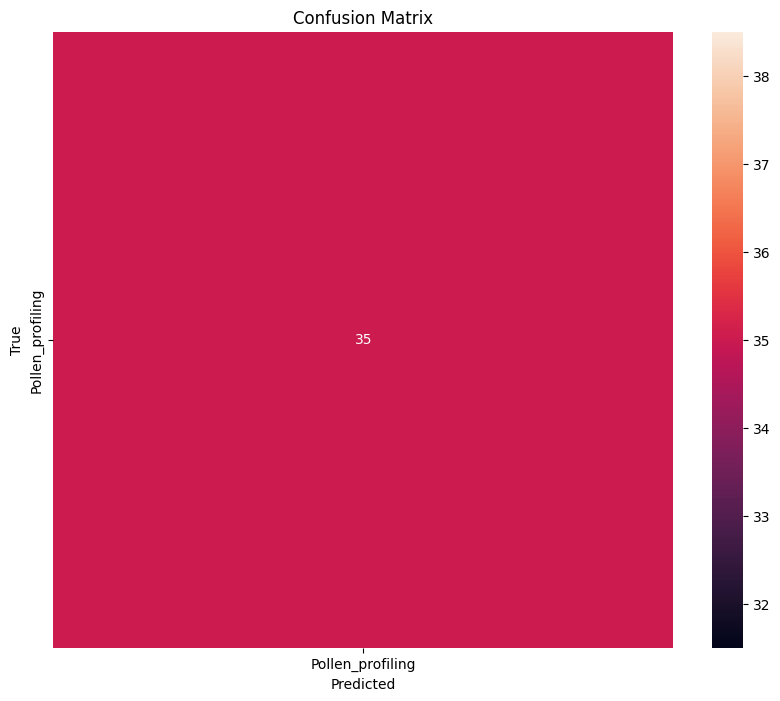

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict classes for validation data
val_steps = validation_generator.samples // validation_generator.batch_size
predictions = model.predict(validation_generator, steps=val_steps+1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = validation_generator.classes[:len(predicted_classes)]

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [41]:
model.save('PollenModel.h5')

In [42]:
from google.colab import files
files.download('PollenModel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
model.save('/content/drive/MyDrive/Kavya/PollenModel.h5')

In [47]:
model.save('/content/drive/My Drive/PollenProject/PollenModel.h5')

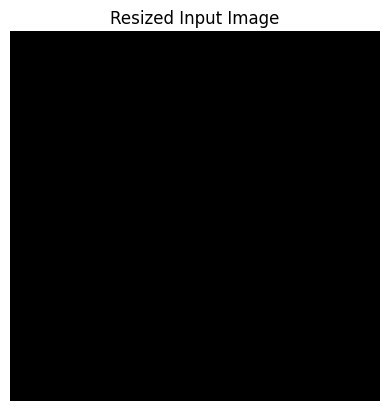

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
✅ Predicted Class: arecaceae


In [73]:
# 📌 Step 1: Install dependencies
!pip install tensorflow pillow --quiet

# 📌 Step 2: Import libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# 📌 Step 3: Assume model is already loaded/trained in memory
# If you're loading from a file, uncomment below:
# from tensorflow.keras.models import load_model
# model = load_model('/content/your_model.h5')

# 📌 Step 4: Get image from test_set and resize to expected input size
images, labels = next(test_set)

# Resize the image to the model's expected input shape (224, 224)
from tensorflow.image import resize

resized_image = resize(images[0], (224, 224))  # Resizing single image
img_array = np.expand_dims(resized_image.numpy(), axis=0)  # Shape: (1, 224, 224, 3)

# Optional: Show the resized image
plt.imshow(img_array[0].astype("uint8"))
plt.axis('off')
plt.title("Resized Input Image")
plt.show()

# 📌 Step 5: Predict
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# 📌 Step 6: Map prediction to label
class_labels = list(test_set.class_indices.keys())
result = class_labels[predicted_class_index]

print("✅ Predicted Class:", result)
